In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import pickle

Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

In [2]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv")
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
print("LISTA COMPLETA DE VARIABLES")
for i, columna in enumerate(df.columns):
    print(f"{i+1:2d}. {columna}")

LISTA COMPLETA DE VARIABLES
 1. fips
 2. TOT_POP
 3. 0-9
 4. 0-9 y/o % of total pop
 5. 19-Oct
 6. 10-19 y/o % of total pop
 7. 20-29
 8. 20-29 y/o % of total pop
 9. 30-39
10. 30-39 y/o % of total pop
11. 40-49
12. 40-49 y/o % of total pop
13. 50-59
14. 50-59 y/o % of total pop
15. 60-69
16. 60-69 y/o % of total pop
17. 70-79
18. 70-79 y/o % of total pop
19. 80+
20. 80+ y/o % of total pop
21. White-alone pop
22. % White-alone
23. Black-alone pop
24. % Black-alone
25. Native American/American Indian-alone pop
26. % NA/AI-alone
27. Asian-alone pop
28. % Asian-alone
29. Hawaiian/Pacific Islander-alone pop
30. % Hawaiian/PI-alone
31. Two or more races pop
32. % Two or more races
33. POP_ESTIMATE_2018
34. N_POP_CHG_2018
35. GQ_ESTIMATES_2018
36. R_birth_2018
37. R_death_2018
38. R_NATURAL_INC_2018
39. R_INTERNATIONAL_MIG_2018
40. R_DOMESTIC_MIG_2018
41. R_NET_MIG_2018
42. Less than a high school diploma 2014-18
43. High school diploma only 2014-18
44. Some college or associate's degree 201

In [4]:
df.shape

(3140, 108)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [7]:
df.isna().sum().sum()

np.int64(0)

En el dataset tenemos 3140 registros y 108 variables: 
* 106 variables numéricas
* 2 variables categóricas

No hay nulos

In [8]:
duplicadas = df.columns[df.T.duplicated()]
duplicadas

Index(['POP_ESTIMATE_2018', 'Median_Household_Income_2018'], dtype='object')

In [9]:
df.drop(duplicadas, axis = 1, inplace = True)
df.drop(["COUNTY_NAME",                                             # Variables de identificación
         "STATE_NAME", 
         "STATE_FIPS", 
         "CNTY_FIPS"], axis =1, inplace = True)
df.drop(["Total Population",                                        # Variables demográficas
         "county_pop2018_18 and older", 
         "Population Aged 60+", 
         "White-alone pop", 
         "Black-alone pop", 
         "Native American/American Indian-alone pop", 
         "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop", 
         "Two or more races pop", 
         "60-69 y/o % of total pop", 
         "70-79 y/o % of total pop", 
         "80+ y/o % of total pop", 
         "0-9", 
         "19-Oct", 
         "20-29", 
         "30-39",
         "40-49",
         "50-59",
         "60-69",
         "70-79", 
         "80+", 
         "N_POP_CHG_2018",
         "GQ_ESTIMATES_2018",
         "R_NATURAL_INC_2018",
         "R_INTERNATIONAL_MIG_2018",
         "R_DOMESTIC_MIG_2018"], axis = 1, inplace = True)
df.drop(["Less than a high school diploma 2014-18",                     # Variables de educación
         "High school diploma only 2014-18", 
         "Some college or associate's degree 2014-18", 
         "Bachelor's degree or higher 2014-18",
         "Percent of adults with a high school diploma only 2014-18",
         "Percent of adults with a bachelor's degree or higher 2014-18"], axis = 1, inplace = True)
df.drop(["POVALL_2018", 
         "PCTPOV017_2018", 
         "PCTPOV517_2018", 
         "CI90LBINC_2018", 
         "CI90UBINC_2018", 
         "Employed_2018", 
         "Unemployed_2018",
         "Civilian_labor_force_2018",
         "MEDHHINC_2018"], axis = 1, inplace = True)
df.drop(["Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)", 
         "Active Primary Care Physicians per 100000 Population 2018 (AAMC)", "Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)", "Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)", "Total Specialist Physicians (2019)", "Total nurse practitioners (2019)", "Total physician assistants (2019)", 
         "Total Hospitals (2019)"], axis = 1, inplace = True)
df.drop(["anycondition_Lower 95% CI", 
         "anycondition_Upper 95% CI", 
         "Heart disease_Lower 95% CI", 
         "Heart disease_Upper 95% CI", 
         "COPD_Lower 95% CI", 
         "COPD_Upper 95% CI", 
         "diabetes_Lower 95% CI", 
         "diabetes_Upper 95% CI", 
         "CKD_Lower 95% CI", 
         "CKD_Upper 95% CI", 
         "Heart disease_number", 
         "COPD_number", 
         "diabetes_number", 
         "CKD_number", 
         "Heart disease_prevalence", 
         "COPD_prevalence", 
         "diabetes_prevalence", 
         "CKD_prevalence",
         "anycondition_number",
         "Obesity_prevalence",
         "Obesity_Lower 95% CI",
         "Obesity_Upper 95% CI",
         "Obesity_number"], axis = 1, inplace = True)

In [10]:
print("LISTA COMPLETA DE VARIABLES")
for i, columna in enumerate(df.columns):
    print(f"{i+1:2d}. {columna}")

LISTA COMPLETA DE VARIABLES
 1. fips
 2. TOT_POP
 3. 0-9 y/o % of total pop
 4. 10-19 y/o % of total pop
 5. 20-29 y/o % of total pop
 6. 30-39 y/o % of total pop
 7. 40-49 y/o % of total pop
 8. 50-59 y/o % of total pop
 9. % White-alone
10. % Black-alone
11. % NA/AI-alone
12. % Asian-alone
13. % Hawaiian/PI-alone
14. % Two or more races
15. R_birth_2018
16. R_death_2018
17. R_NET_MIG_2018
18. Percent of adults with less than a high school diploma 2014-18
19. Percent of adults completing some college or associate's degree 2014-18
20. PCTPOVALL_2018
21. Unemployment_rate_2018
22. Med_HH_Income_Percent_of_State_Total_2018
23. Active Physicians per 100000 Population 2018 (AAMC)
24. Active General Surgeons per 100000 Population 2018 (AAMC)
25. Internal Medicine Primary Care (2019)
26. Family Medicine/General Practice Primary Care (2019)
27. ICU Beds_x
28. Percent of Population Aged 60+
29. anycondition_prevalence
30. Urban_rural_code


In [11]:
# Hay 108 variables y las vamos a distribuir por grupos por palabras clave:
demografico = [col for col in df.columns 
               if 'pop' in col.lower() or
               'alone' in col.lower() or  
               'birth' in col.lower() or 
               'death' in col.lower() or 
               'mig' in col.lower()]
educacion = [col for col in df.columns 
             if 'school' in col.lower() or 
             'degree' in col.lower()]
economia = [col for col in df.columns 
            if 'inc' in col.lower() or 
            'employ' in col.lower() or
            "pov" in col.lower()]
salud = [col for col in df.columns 
         if 'anycondition' in col or 
         'obesity' in col or
         "heart" in col.lower() or
         "copd" in col.lower() or
         "diabetes" in col.lower() or
         "ckd" in col.lower()]
recursos_salud = [col for col in df.columns 
         if 'physician' in col.lower() or 
         'surgeon' in col.lower() or
         "nurse" in col.lower() or
         "hospital" in col.lower() or
         "beds" in col.lower()]

In [12]:
df[demografico].describe()

,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,% White-alone,% Black-alone,% NA/AI-alone,% Asian-alone,% Hawaiian/PI-alone,R_birth_2018,R_death_2018,R_NET_MIG_2018,Active Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Percent of Population Aged 60+
count,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,11.871051,12.694609,12.283979,11.751535,11.556685,13.526733,84.494109,9.342405,2.344741,1.554548,0.141007,11.167739,10.365287,1.116433,254.923567,7.621943,24.736943
std,3.335834e+05,2.124081,1.815044,3.126297,1.696599,1.372935,1.481692,16.348987,14.478294,7.721990,2.857088,0.967946,2.522839,2.687543,11.385537,42.291759,1.288832,5.564871
min,8.800000e+01,0.000000,0.000000,0.000000,6.092789,2.631579,5.316361,3.841985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-62.100000,191.300000,5.600000,5.800000
25%,1.096325e+04,10.594639,11.674504,10.496774,10.689322,10.685197,12.738561,79.620473,0.867069,0.384294,0.465659,0.031896,9.700000,8.700000,-5.000000,227.600000,6.900000,21.200000
50%,2.580050e+04,11.802727,12.687422,11.772649,11.580861,11.618372,13.621339,91.410189,2.545440,0.641143,0.739372,0.062024,11.000000,10.400000,0.500000,247.100000,7.100000,24.400000
75%,6.791300e+04,12.951840,13.659282,13.182260,12.639379,12.386083,14.429115,95.521727,10.852053,1.331416,1.433411,0.118429,12.400000,12.200000,6.825000,278.800000,8.300000,27.800000
max,1.010552e+07,25.460677,23.304372,37.570198,22.225129,19.430369,20.454545,99.043785,86.069762,92.515200,42.952310,48.863636,30.100000,21.900000,69.400000,847.000000,25.300000,64.200000


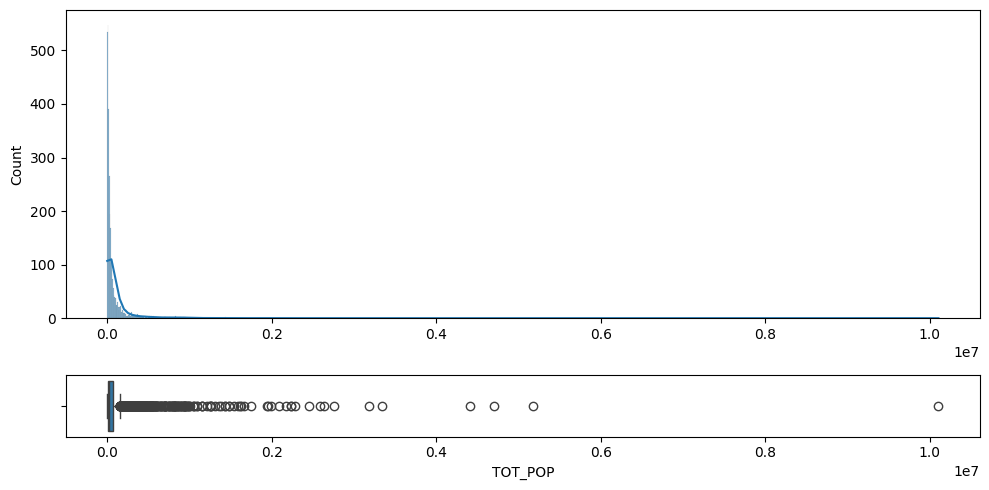

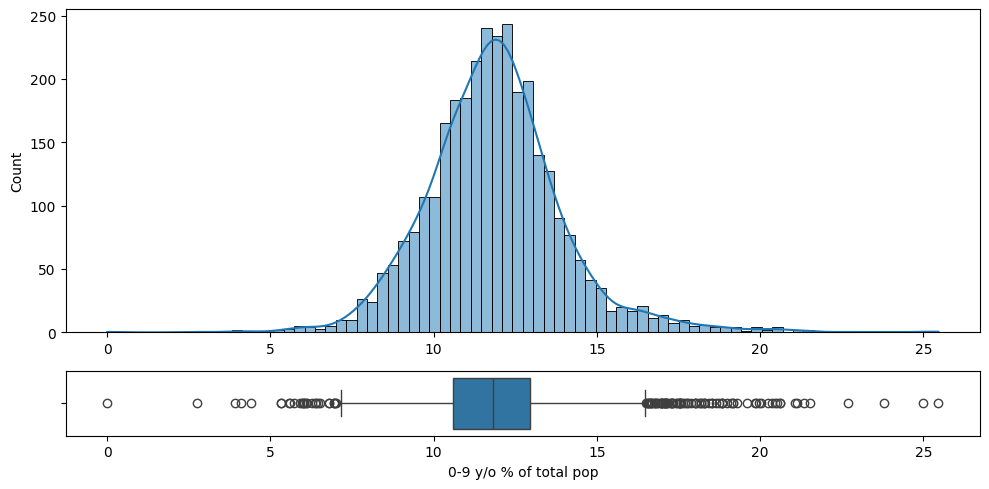

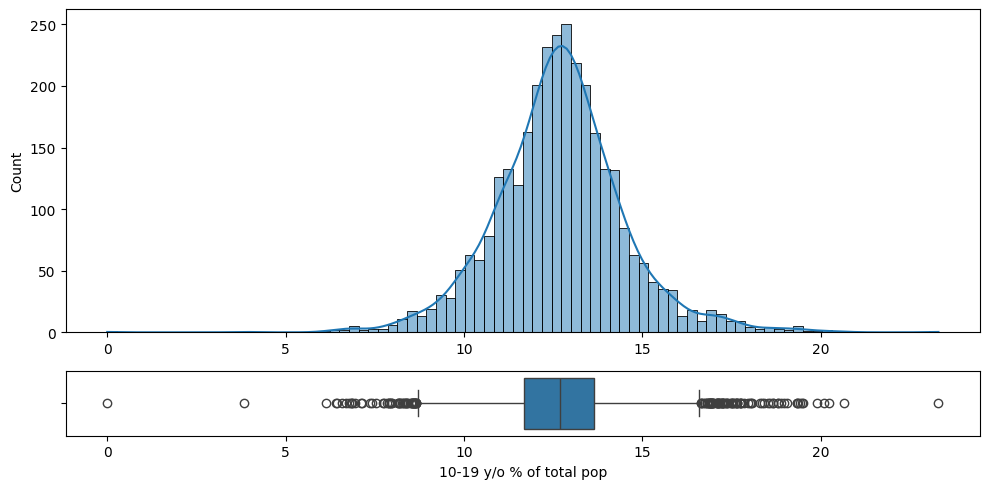

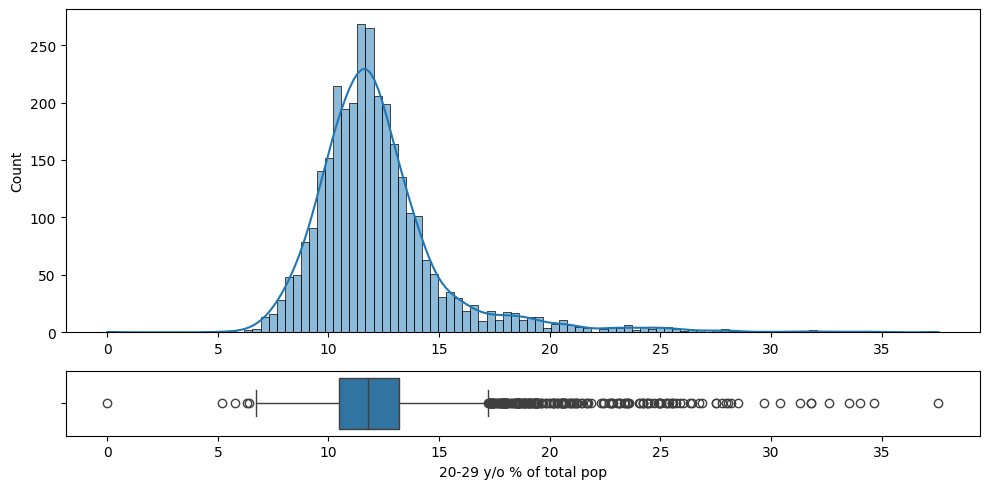

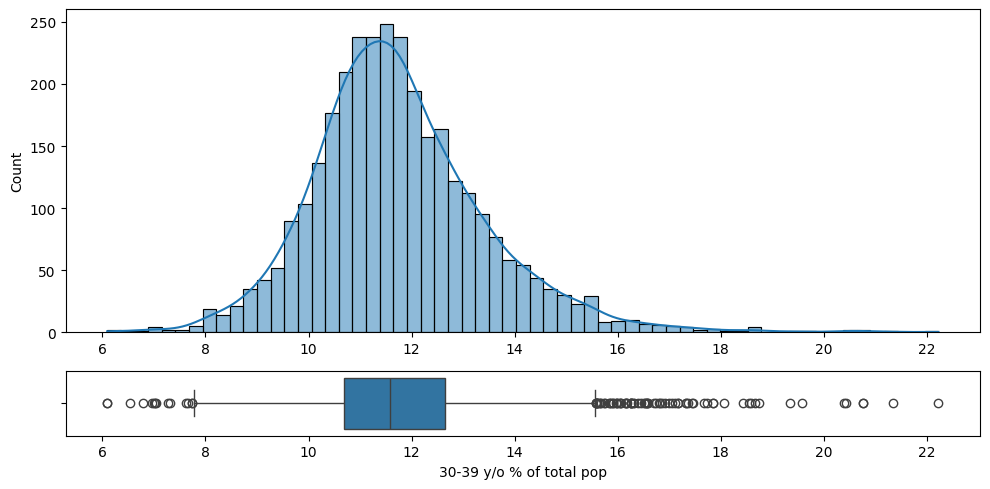

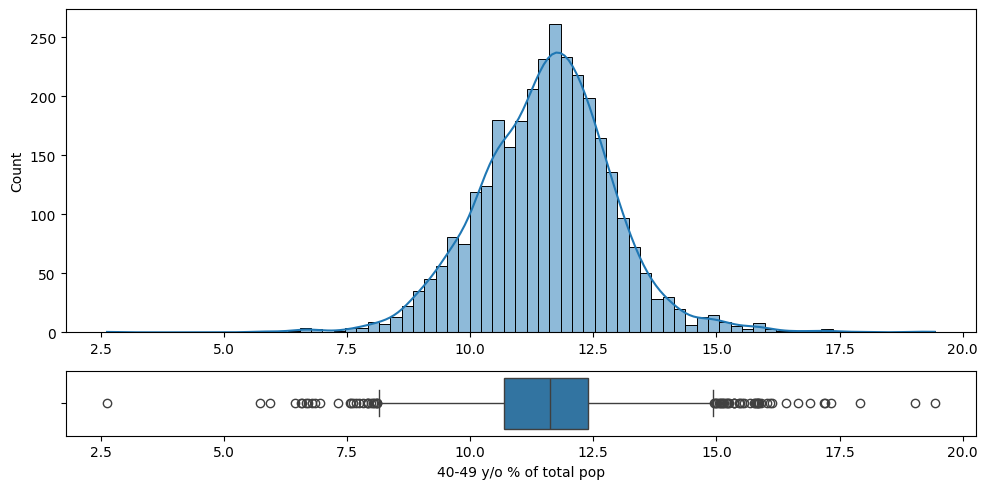

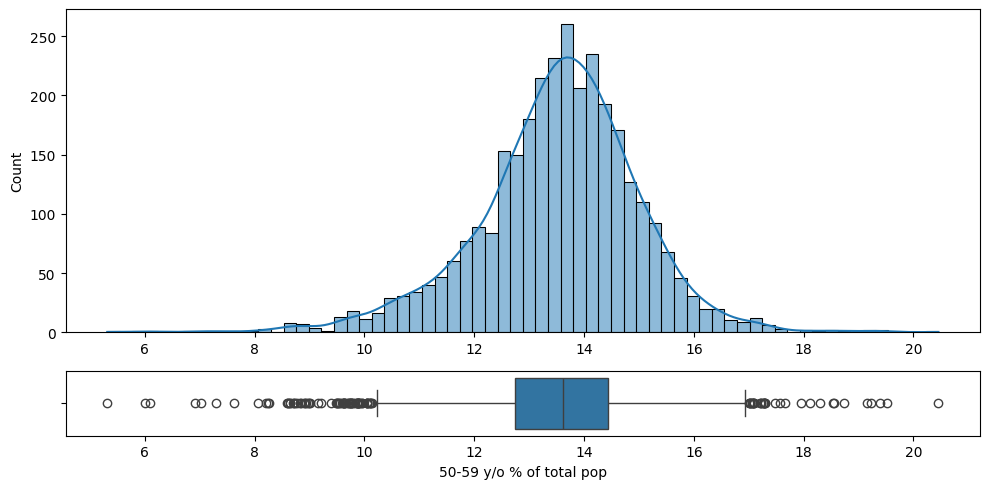

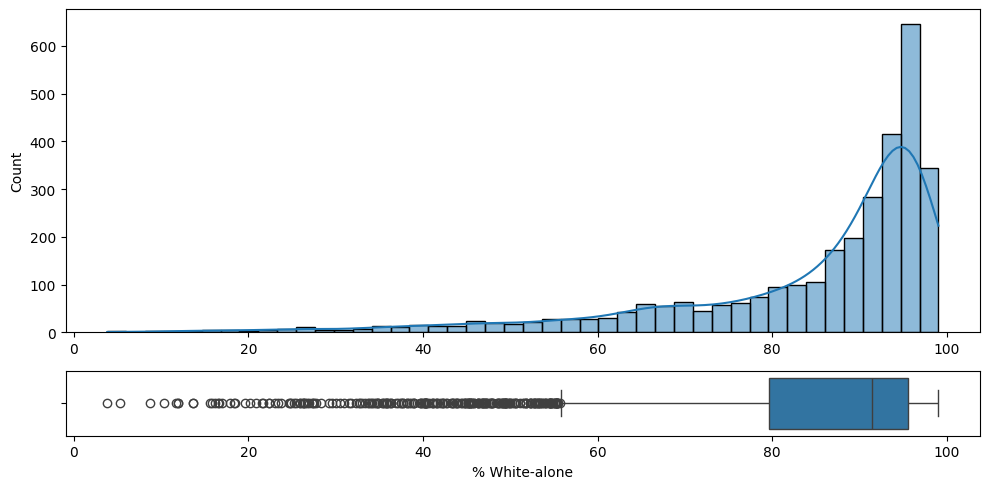

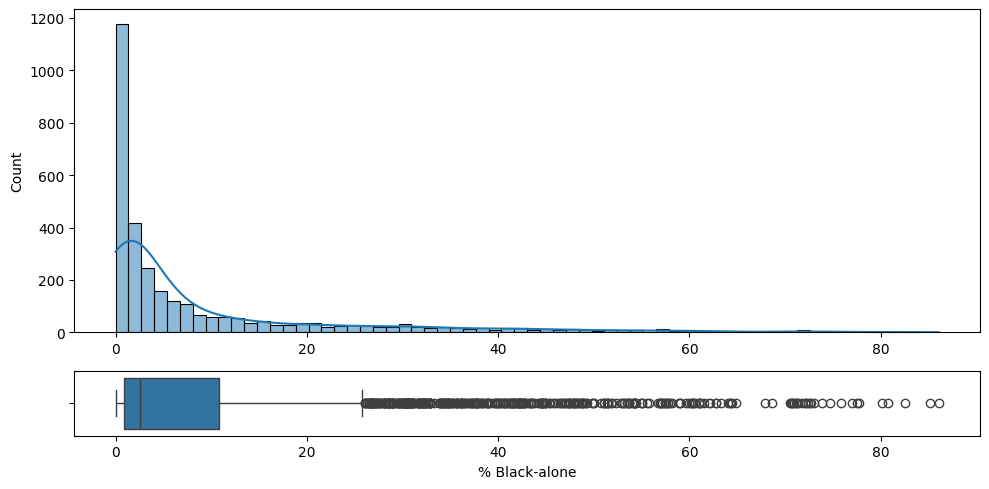

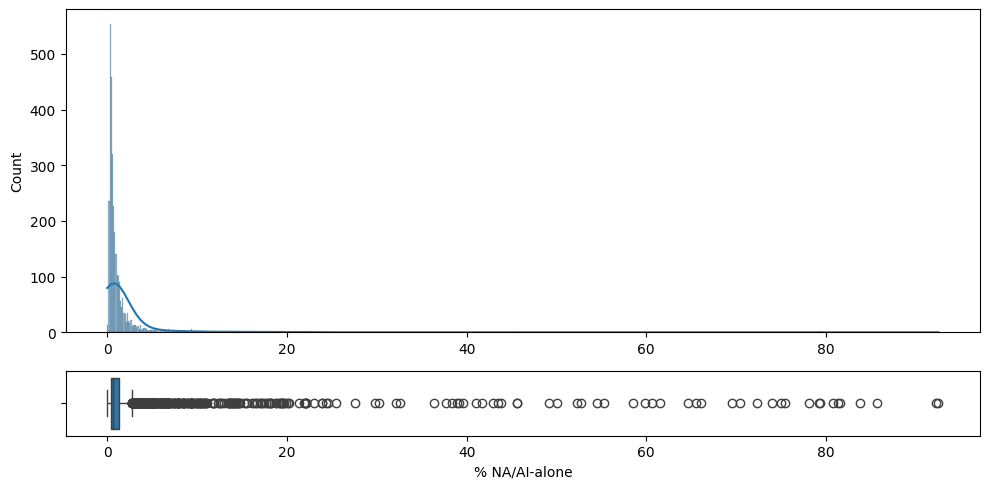

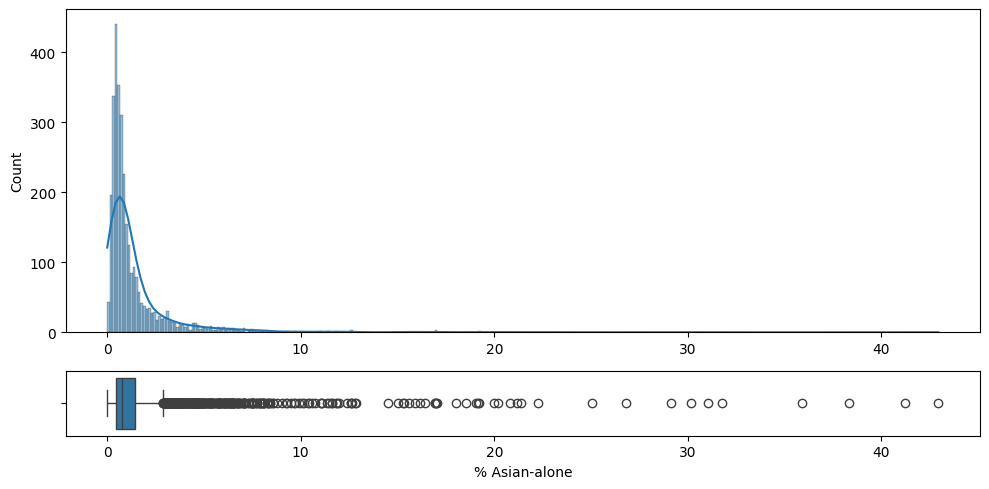

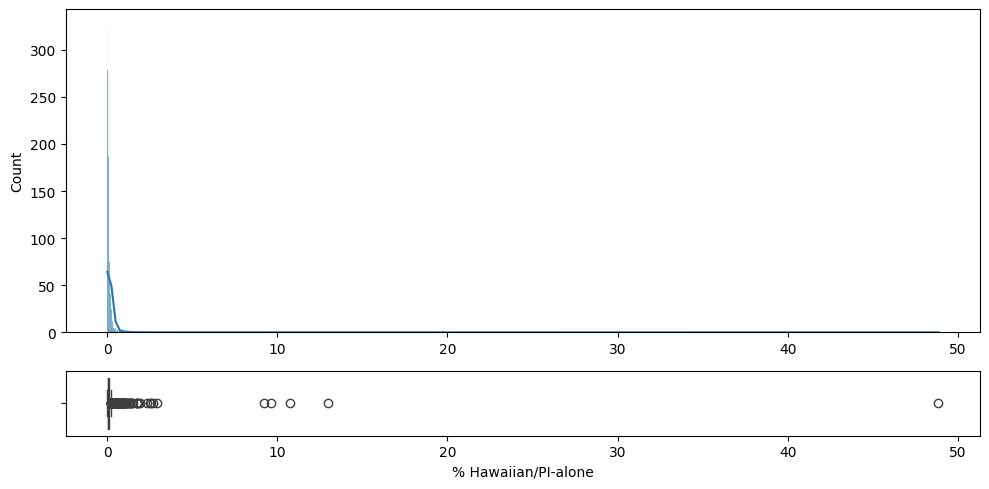

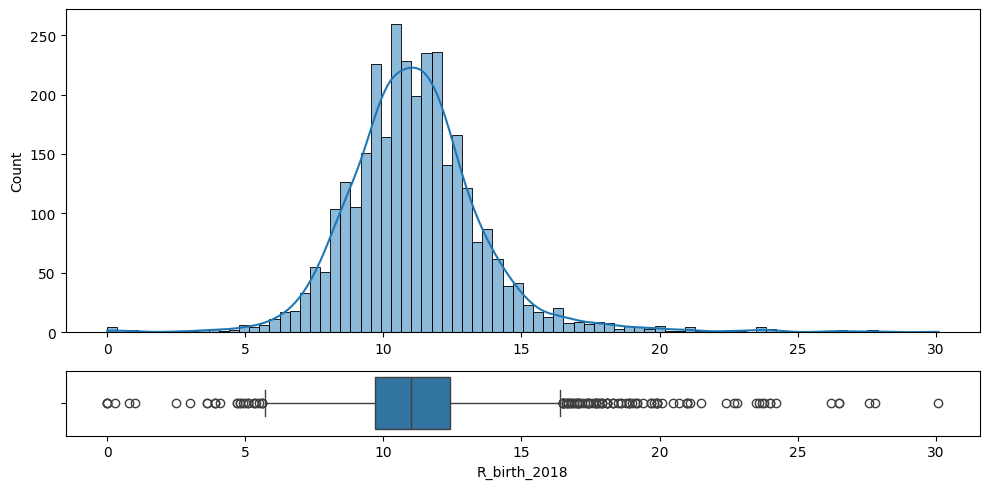

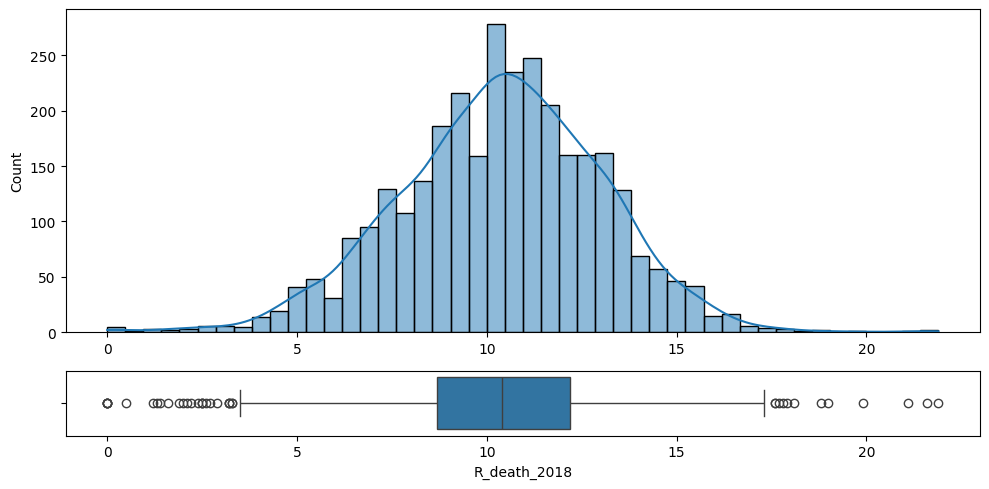

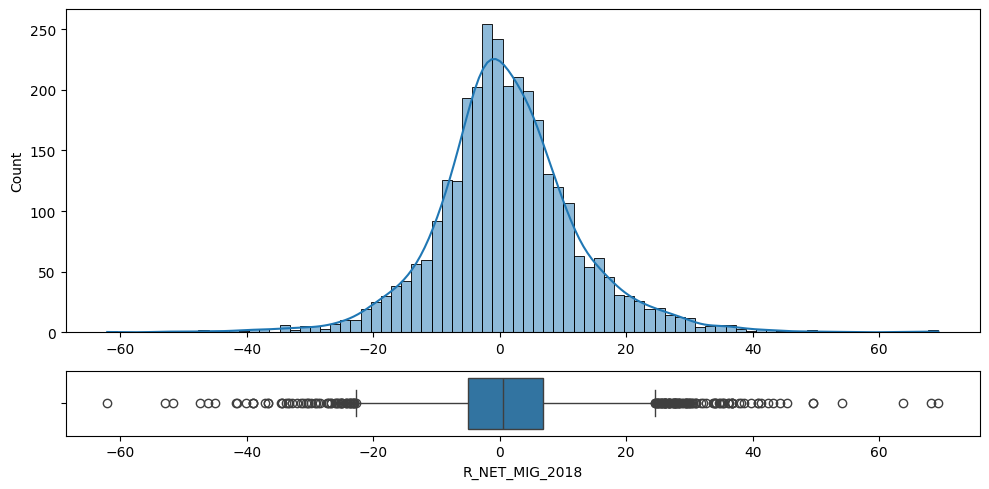

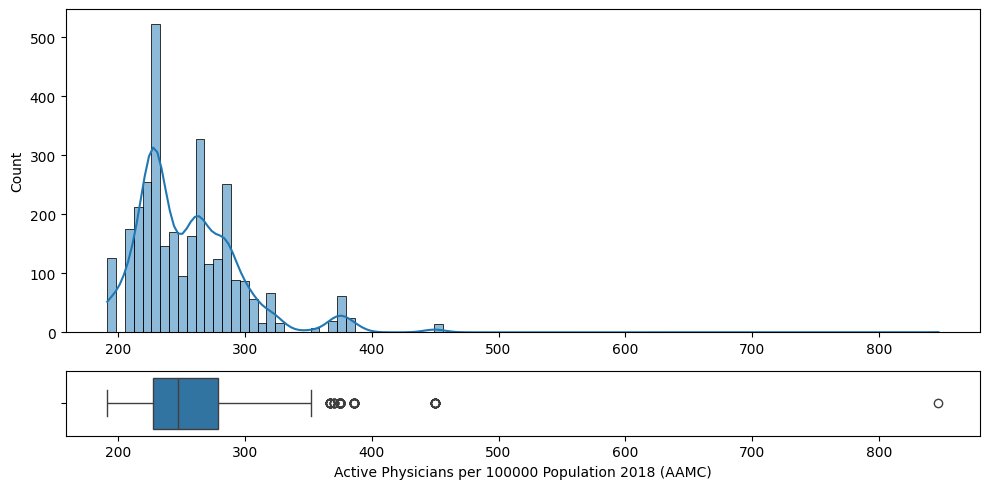

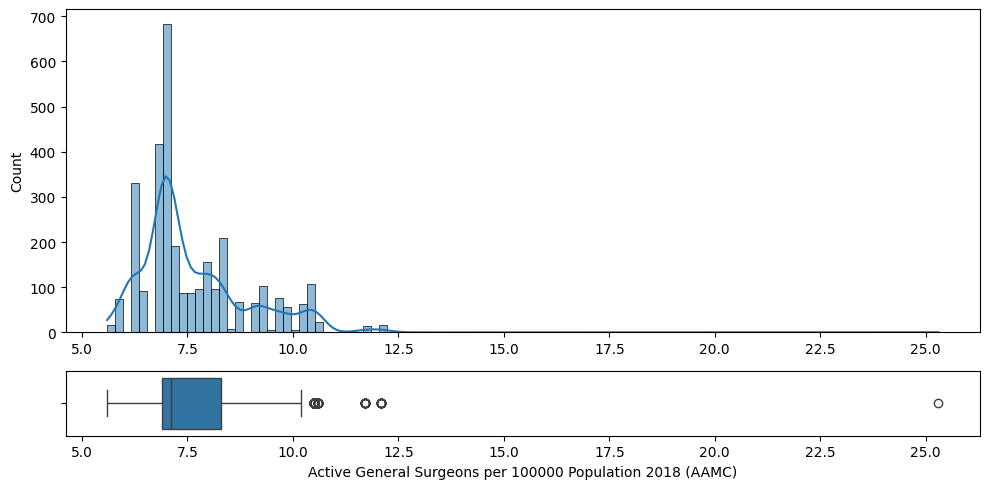

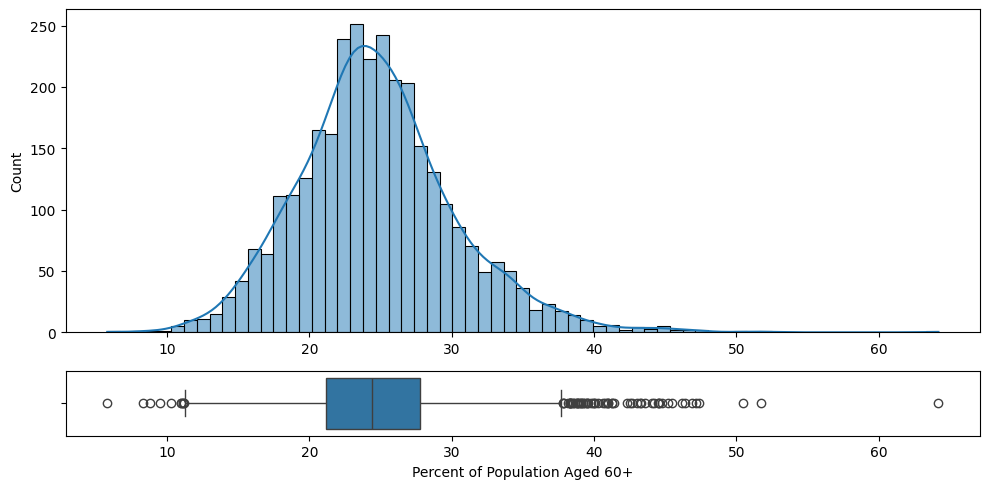

In [13]:
for col in demografico:
    fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [5, 1]})
    sns.histplot(df[col], kde=True, ax=axes[0]).set(xlabel = None)
    sns.boxplot(x=df[col], ax=axes[1])
    plt.tight_layout()
    plt.show()


<Axes: >

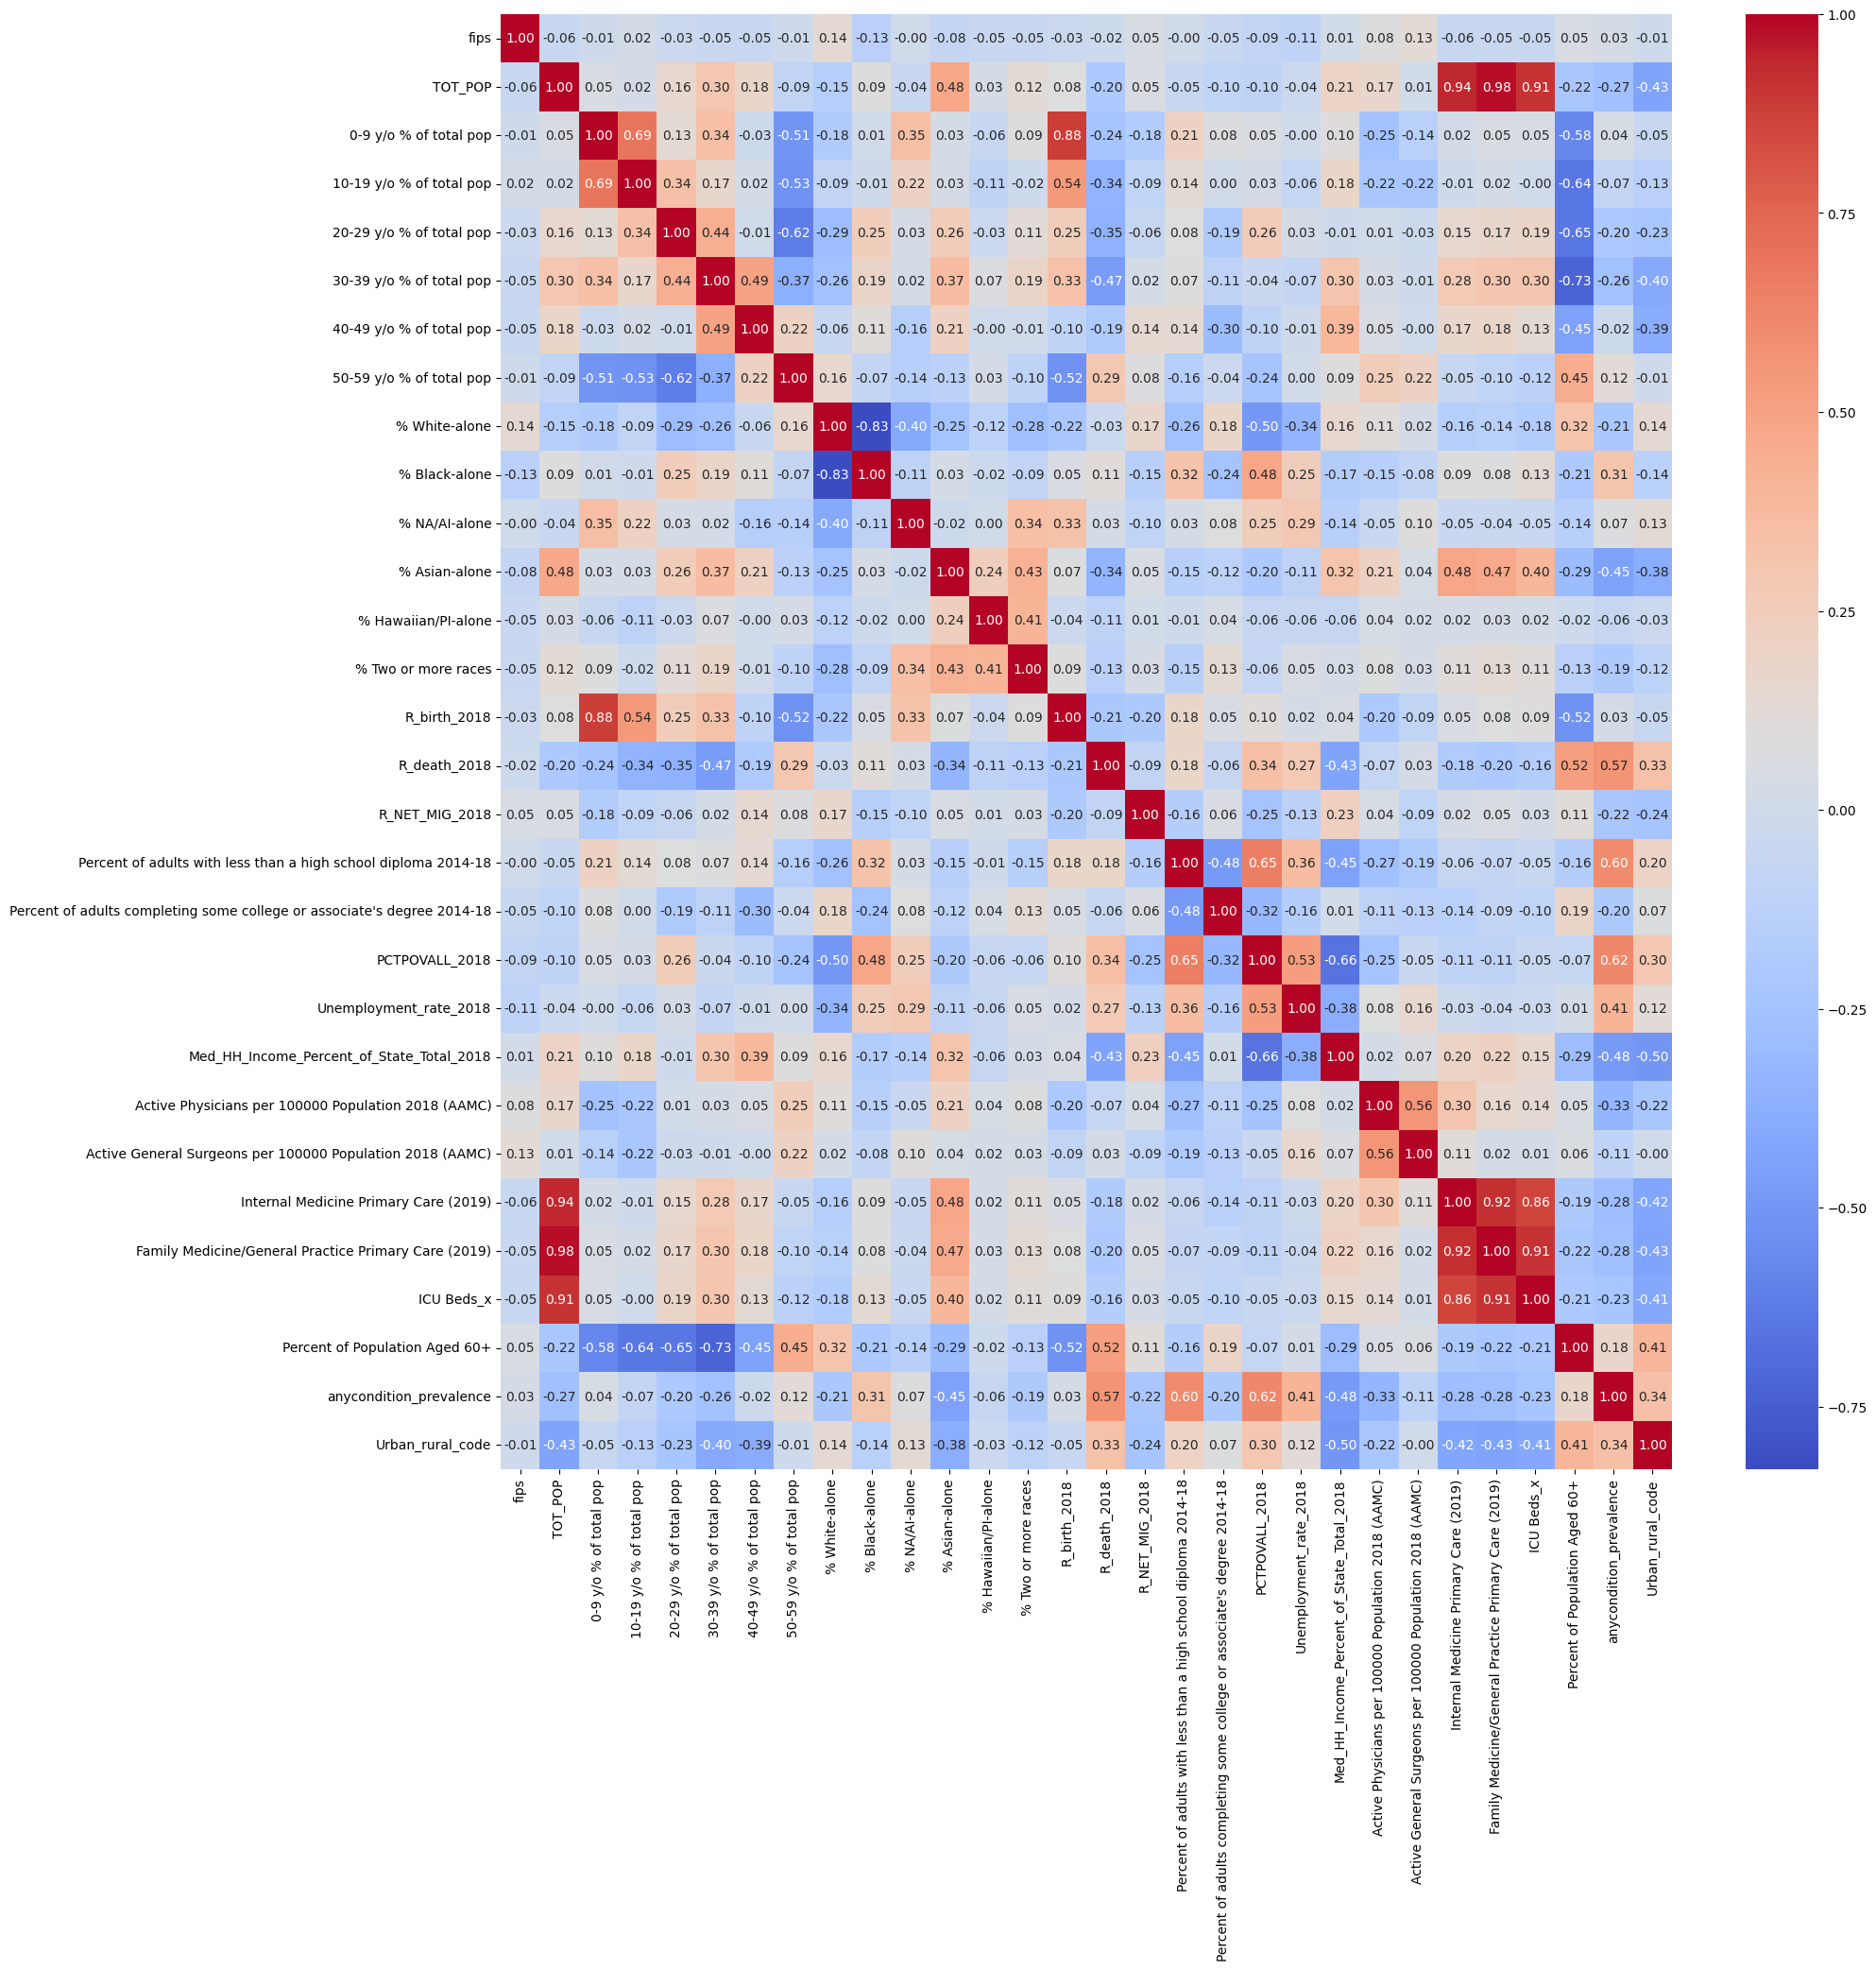

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True, fmt = ".2f")

In [17]:
df.isna().sum().sort_values(ascending=False).head()

fips                        0
TOT_POP                     0
0-9 y/o % of total pop      0
10-19 y/o % of total pop    0
20-29 y/o % of total pop    0
dtype: int64

Escogemos como variable objetivo R_death_2018

#### Split

In [19]:
X = df.drop("R_death_2018", axis = 1)
y = df["R_death_2018"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,% White-alone,% Black-alone,...,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),ICU Beds_x,Percent of Population Aged 60+,anycondition_prevalence,Urban_rural_code
1292,26127,26625,12.097653,13.006573,10.974648,10.625352,10.632864,14.388732,95.072300,1.265728,...,6.1,88.9,287.0,7.9,19.750506,16.042791,0,27.4,49.7,6
2302,42121,51266,10.283619,11.217961,10.020286,10.418211,11.469590,15.380564,96.871221,1.156712,...,4.9,75.2,320.5,8.7,41.534592,28.837240,8,28.8,46.7,5
761,18133,37779,10.362900,13.547209,16.416528,11.548744,11.781678,13.518092,93.300511,3.798407,...,3.8,98.2,230.8,6.5,14.853312,18.759998,6,21.5,47.0,2
2194,40131,91984,12.135806,13.748043,12.605453,12.346712,12.441294,13.887198,75.247869,1.277396,...,3.3,119.1,206.7,6.2,30.769583,52.721196,6,21.6,46.9,3
1241,26025,134487,12.416070,13.135842,12.849569,11.891856,11.781808,13.370809,81.515686,11.156469,...,4.2,85.5,287.0,7.9,99.762864,81.034623,32,23.2,48.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,55093,42555,10.522853,15.321349,16.423452,11.331218,11.465163,13.714017,95.798379,0.869463,...,3.2,124.1,264.9,7.9,22.340473,23.980141,0,19.6,37.7,2
1095,21209,56031,13.606753,14.265317,13.687066,13.813782,14.204637,12.923203,90.806875,5.493388,...,3.3,146.4,230.9,8.3,24.765280,23.824826,6,16.1,49.0,3
1130,22039,33443,13.993960,13.659062,14.286996,12.555692,11.251981,13.022157,69.569118,28.149389,...,5.8,71.0,260.3,9.1,17.991845,12.860545,24,20.6,52.9,6
1294,26131,5795,5.711821,8.507334,5.780846,6.540121,9.318378,17.014668,95.979292,0.327869,...,7.8,72.0,287.0,7.9,4.298749,3.491755,0,44.6,52.6,6


In [21]:
y_train

1292    10.0
2302    13.1
761      9.2
2194     9.1
1241    10.3
        ... 
3092     7.1
1095     7.5
1130    11.4
1294    19.0
860     12.8
Name: R_death_2018, Length: 2512, dtype: float64

#### Escalado

In [22]:
# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train)

# aplico el escalador en ambos
X_train_final = scaler.transform(X_train)
X_train_final = pd.DataFrame(X_train_final, index = X_train.index, columns = X_train.columns)

X_test_final = scaler.transform(X_test)
X_test_final = pd.DataFrame(X_test_final, index = X_test.index, columns = X_test.columns)

X_train_final.head()

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49 y/o % of total pop,50-59 y/o % of total pop,% White-alone,% Black-alone,...,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),ICU Beds_x,Percent of Population Aged 60+,anycondition_prevalence,Urban_rural_code
1292,-0.301633,-0.229763,0.102383,0.162374,-0.429454,-0.665485,-0.698327,0.585470,0.648457,-0.557226,...,1.373207,-0.032380,0.745911,0.211338,-0.200241,-0.212795,-0.279417,0.501352,0.460434,0.910528
2302,0.761573,-0.161280,-0.754597,-0.836073,-0.736296,-0.785934,-0.073361,1.253363,0.759892,-0.564855,...,0.539173,-0.710993,1.530197,0.822599,-0.106092,-0.123374,-0.190529,0.757912,-0.009886,0.249092
761,-0.833037,-0.198764,-0.717144,0.464170,1.320194,-0.128551,0.159743,-0.000813,0.538703,-0.379993,...,-0.225359,0.428284,-0.569817,-0.858370,-0.221406,-0.193804,-0.212751,-0.579864,0.037146,-1.735217
2194,0.629287,-0.048115,0.120407,0.576280,0.094875,0.335452,0.652423,0.247740,-0.579575,-0.556409,...,-0.572873,1.463539,-1.134035,-1.087593,-0.152617,0.043554,-0.212751,-0.561538,0.021469,-1.073780
1241,-0.308413,0.070012,0.252809,0.234535,0.173362,0.070962,0.159841,-0.099992,-0.191312,0.134914,...,0.052653,-0.200795,0.745911,0.211338,0.145565,0.241439,0.076136,-0.268327,0.193919,-0.412344


In [23]:
# Guardamos los datos en formato .csv
X_train_final.to_csv("../data/processed/X_train.csv", index=False)
X_test_final.to_csv("../data/processed/X_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

#### Modelo de regresión lineal

In [24]:
model = LinearRegression()

model.fit(X_train_final, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficientes (b1-b29): {model.coef_}")

Intercepto (b0): 10.365883754329728
Coeficientes (b1-b29): [-1.23302644e-01 -6.55069986e-01  4.14402361e-01 -1.60481382e-01
  1.57768570e-01 -2.78147185e-01  3.46371779e-01  2.07191754e-01
  7.57287987e+06  6.70355317e+06  3.57197697e+06  1.32742405e+06
  4.91029120e+05  6.99051415e+05 -2.59853300e-02  2.36224592e-02
 -5.57186507e-01 -2.58624636e-01  1.99046036e-01 -4.06777321e-03
 -4.74918033e-01  3.76092264e-03  2.33670306e-02  2.04784655e-01
  2.49812145e-01  2.57848629e-01  1.10148482e+00  1.21048021e+00
 -1.79497433e-02]


In [27]:
y_pred = model.predict(X_test_final)
y_pred

array([10.85398374,  8.03614579, 13.65257114,  8.82722545,  7.32314327,
        8.72937872,  9.98116216, 14.89695332, 11.72086575,  6.61205489,
       10.79189926, 12.28397825,  6.86377194, 13.50386247,  8.31622503,
       10.28586887, 10.04959134, 10.97759189, 12.65760813, 10.48774023,
       11.04607697, 10.43320968,  9.18587338, 12.98507569,  8.35225225,
        5.84192968,  7.23398541,  8.90554702,  9.99964583, 11.43348756,
       14.56316996, 12.43219604, 10.62232468, 11.86998192,  8.50878866,
       11.54663549, 10.41942866,  9.29515287, 11.21006841,  7.34249211,
       11.79151725,  7.29780479, 10.90889146, 10.78840477,  8.30587299,
       12.06543189, 10.71951832, 11.04370114, 13.30382666, 14.17075247,
       12.29956749, 14.03950939,  6.7763357 , 11.01017133,  9.81320229,
       11.3946572 ,  8.69983752,  6.75522249, 11.59270556, 12.13290685,
        8.24403047, 12.38233302, 12.79006222,  8.93510839,  8.20800604,
        7.71972348, 11.50819605, 12.62325818, 12.10110191,  8.99